In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [10]:
fig_width = 6.3  
fig_height = 3.54  


data = pd.read_excel("summary_per_color_group.xlsx")
test_data = data.rename(columns=lambda x: x.replace('T258', 'CM')) #замена названий столбцов
columns = ["CM_dH+_yellow_green_50%", "CM_dH+_blue_50%", "CM_dH+_purple_50%", "CM_dH+_red_50%"]

In [20]:
def build_age_param_scatterplots(data, columns, save_fig=False):
            
    color_dict = sns.color_palette("bright", n_colors=4) 
    
    for i,col in enumerate(columns):
        plt.figure(figsize=(fig_width, fig_height), dpi=300)
        sns.scatterplot(data=data, x='age', y=col, color=color_dict[i], s=20) #s=50 размер точек до изменения

        lowess_res = sm.nonparametric.lowess(exog=data['age'], endog=data[col], frac=0.3)#продвинутое сглаживание точек, чем больше frac тем плавнее линия
                                                            #(доля точек для сглаживания), возвращает двумерный массив
        plt.plot(lowess_res[:, 0], lowess_res[:, 1], linewidth=2, color='black')
        
        col = col.replace('_', ' ') #изменение названий параметра для графика
        if (col == "CM dH+ yellow green 50%"):
            col = "CM dH+ yellow-green 50%"

        plt.xlabel('Возраст', fontsize=14, fontweight='light')
        plt.ylabel(col, fontsize=14, fontweight='light')
    
        if save_fig:
            plt.savefig("scatterplot")
            #plt.savefig(f'D:/AI/HIstogram/scat_vith_regplot/plot_{}_{}_vs_{}.png', format='png', dpi=600")


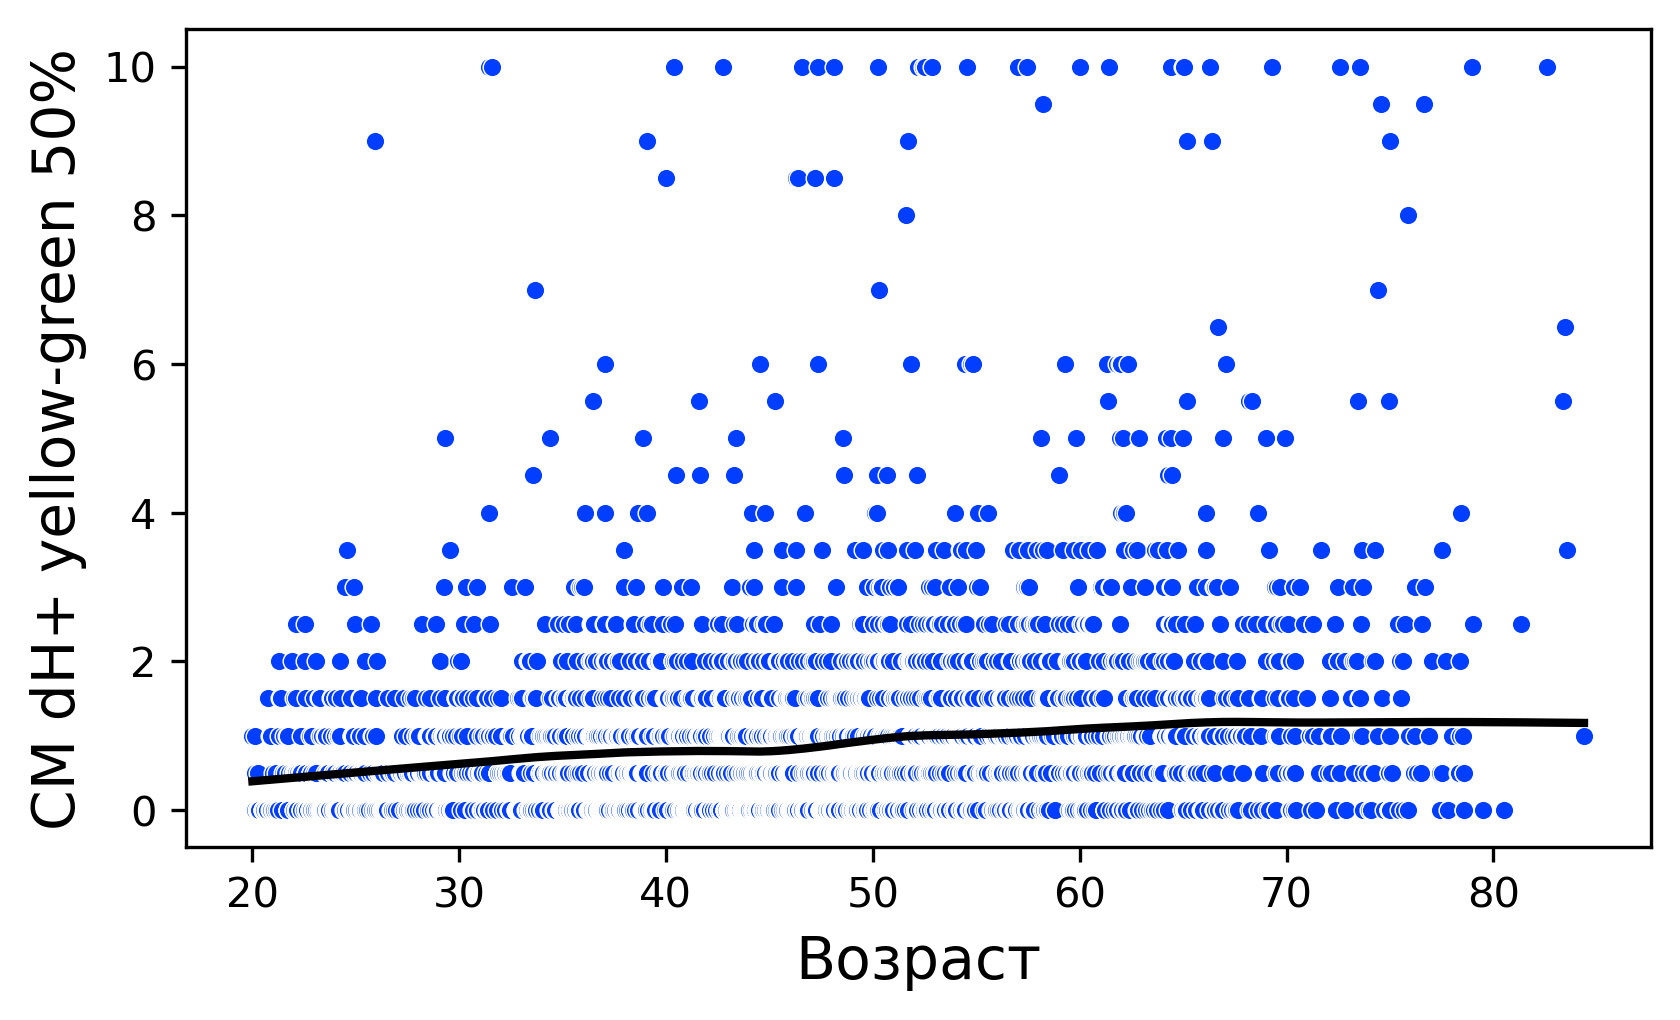

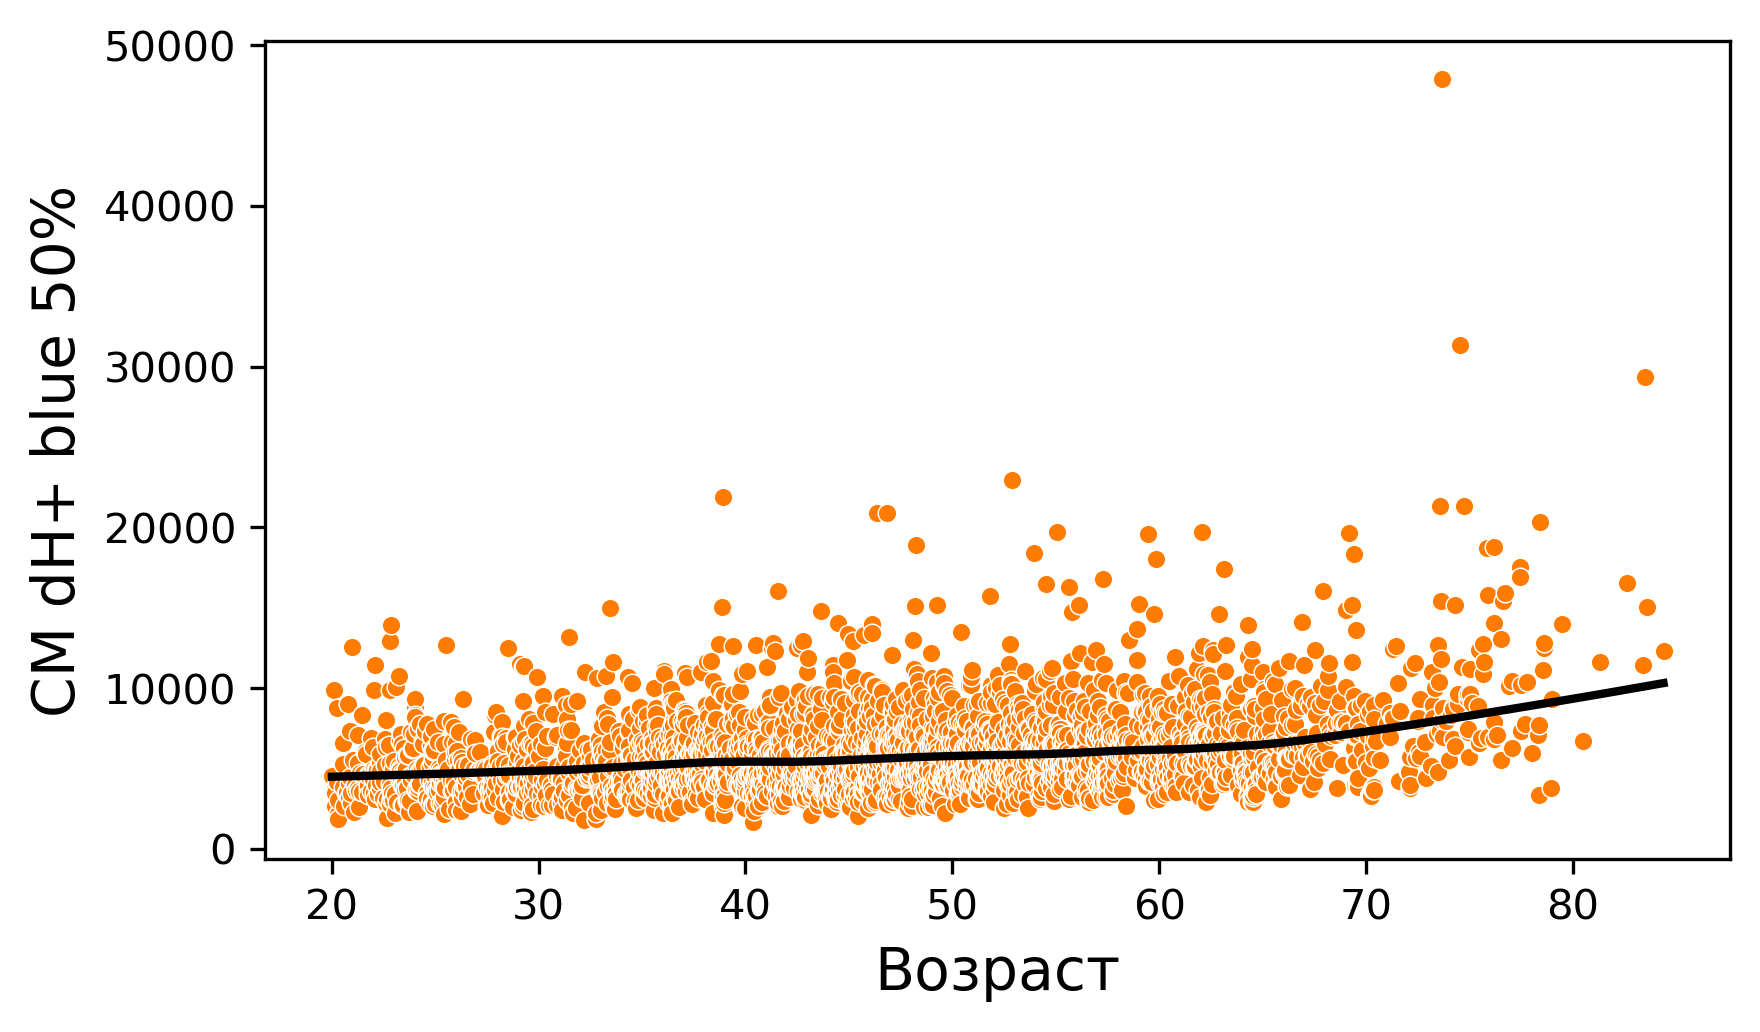

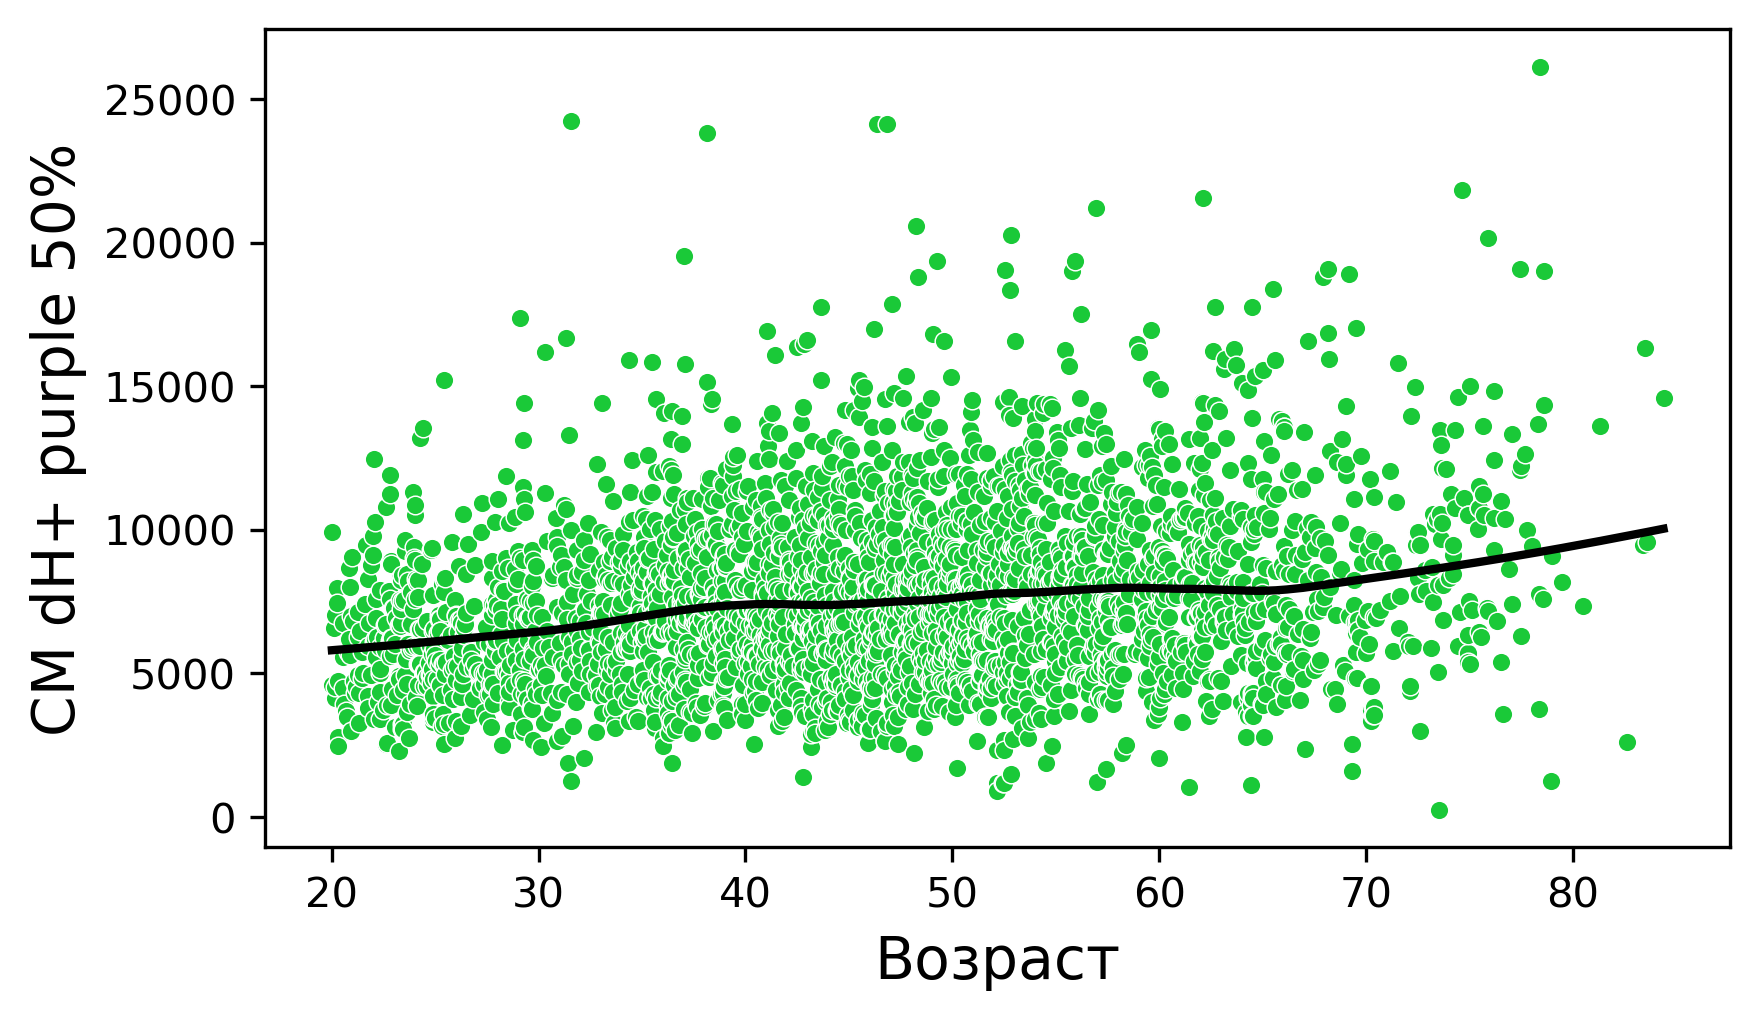

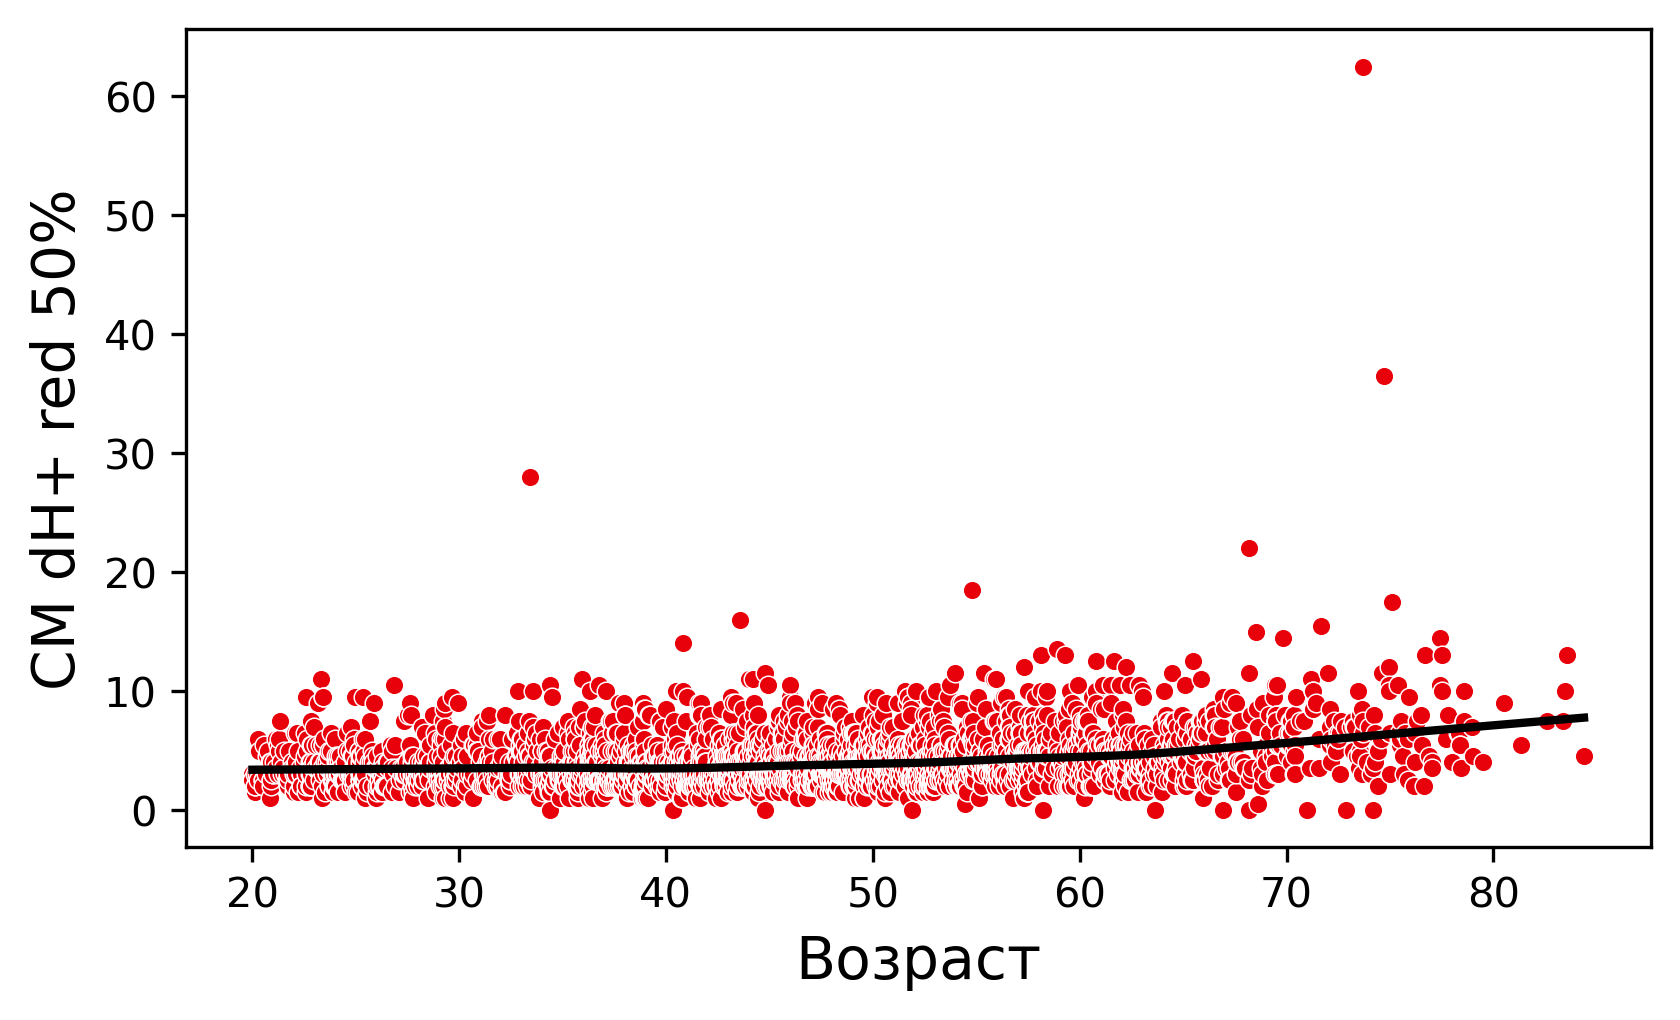

In [21]:
build_age_param_scatterplots(test_data,columns)

In [35]:
def build_age_param_gender_scatterplots(data, columns, save_fig=False):
    mask_men = data["sex"] == 1
    mask_women = data["sex"] == 0
        
    for i,col in enumerate(columns):
        plt.figure(figsize=(fig_width, fig_height), dpi=300)
        
        sns.scatterplot(
            data=data[mask_men],
            x=data['age'][mask_men] + np.random.uniform(-0.5, 0.5, size=len(data[mask_men])),
            y=col,
            color='blue',
            s=20,
            label="Мужчины") #s=50 размер точек до изменения
        
        sns.scatterplot(
            data=data[mask_women],
            x=data['age'][mask_women] + np.random.uniform(-0.5, 0.5, size=len(data[mask_women])),
            y=col,
            color='red',
            s=20,
            label="Женщины") #s=50 размер точек до изменения
        
        lowess_res = sm.nonparametric.lowess(exog=data['age'], endog=data[col], frac=0.3)#продвинутое сглаживание точек, чем больше frac тем плавнее линия
                                                            #(доля точек для сглаживания), возвращает двумерный массив        
        plt.plot(lowess_res[:, 0], lowess_res[:, 1], linewidth=2, color='black')
        
        col = col.replace('_', ' ') #изменение названий параметра для графика
        if (col == "CM dH+ yellow green 50%"):
            col = "CM dH+ yellow-green 50%"

        plt.xlabel('Возраст', fontsize=14, fontweight='light')
        plt.ylabel(col, fontsize=14, fontweight='light')
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))# сдвиг легенды за график
        plt.show()
        
        if save_fig:
            plt.savefig("scatterplot")
            #plt.savefig(f'D:/AI/HIstogram/scat_vith_regplot/plot_{}_{}_vs_{}.png', format='png', dpi=600")

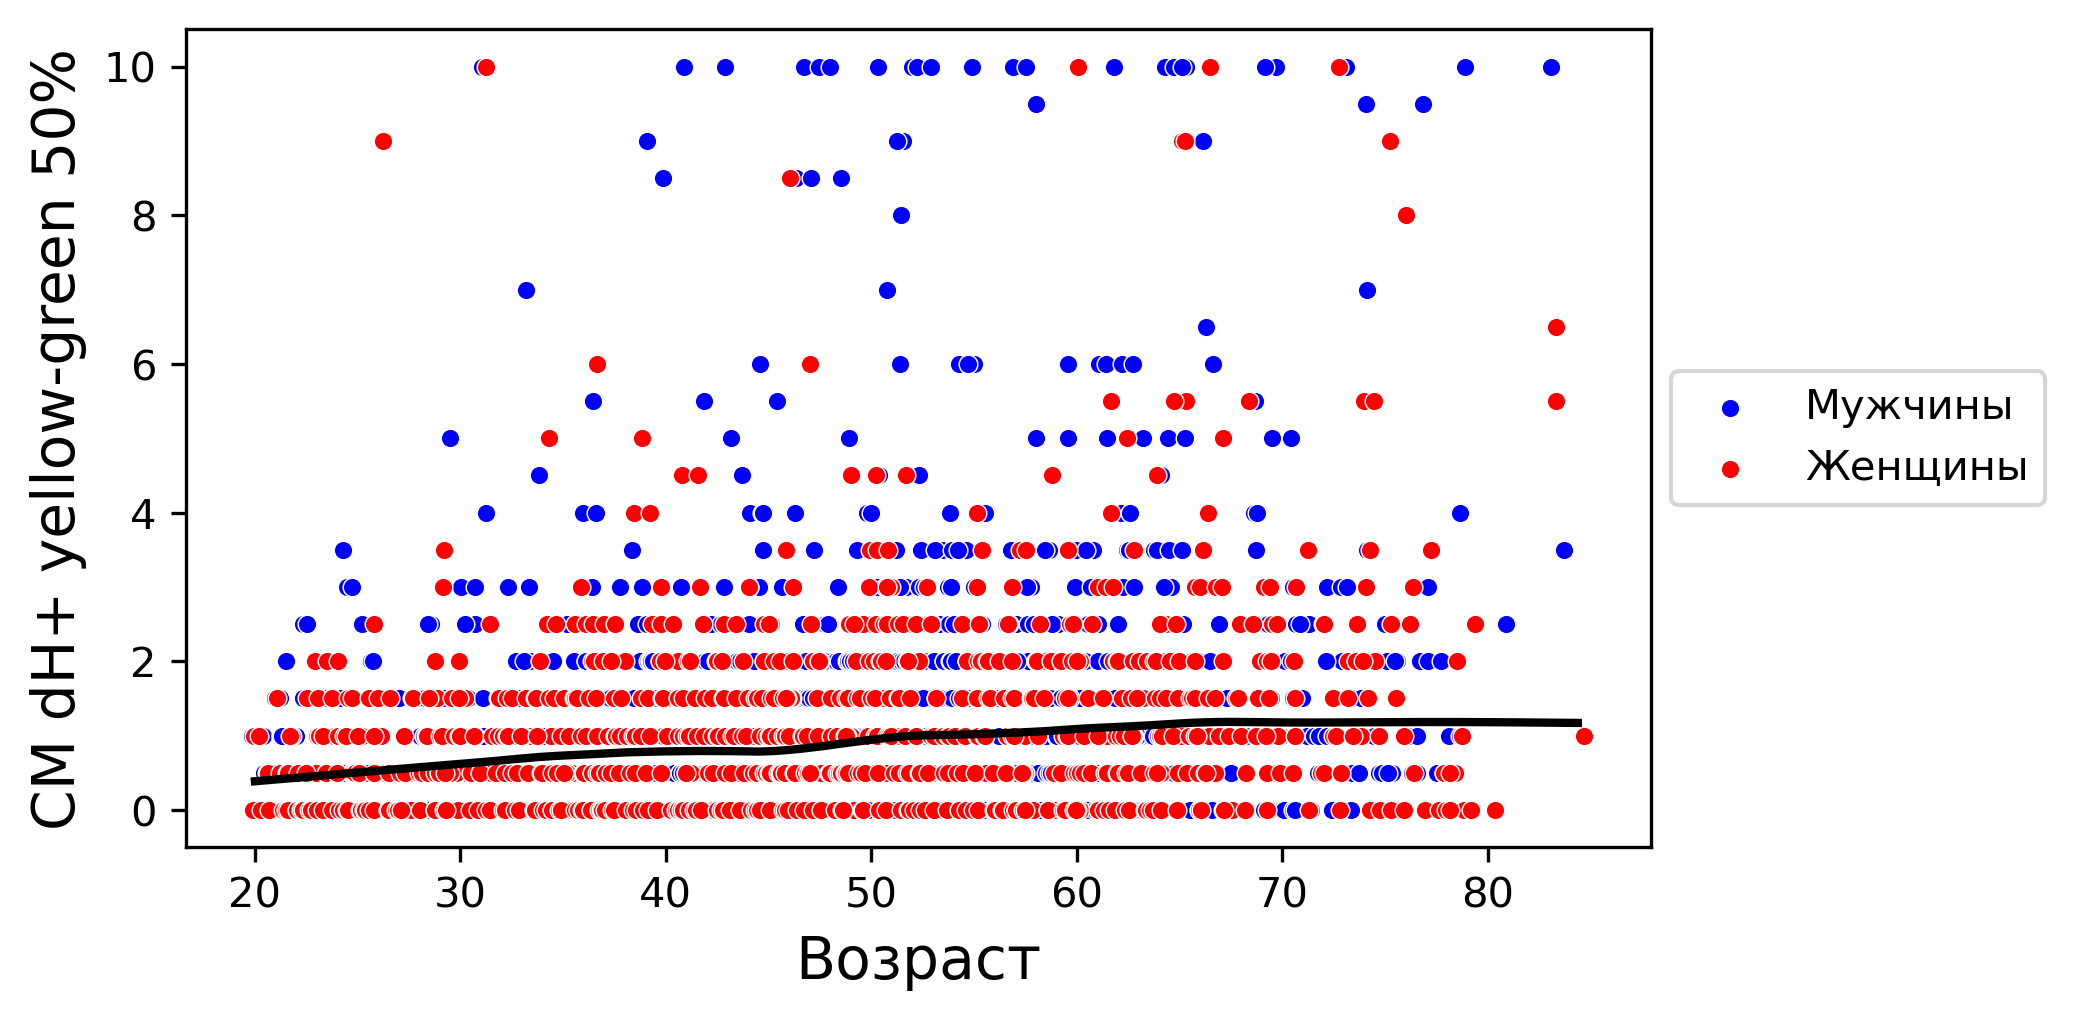

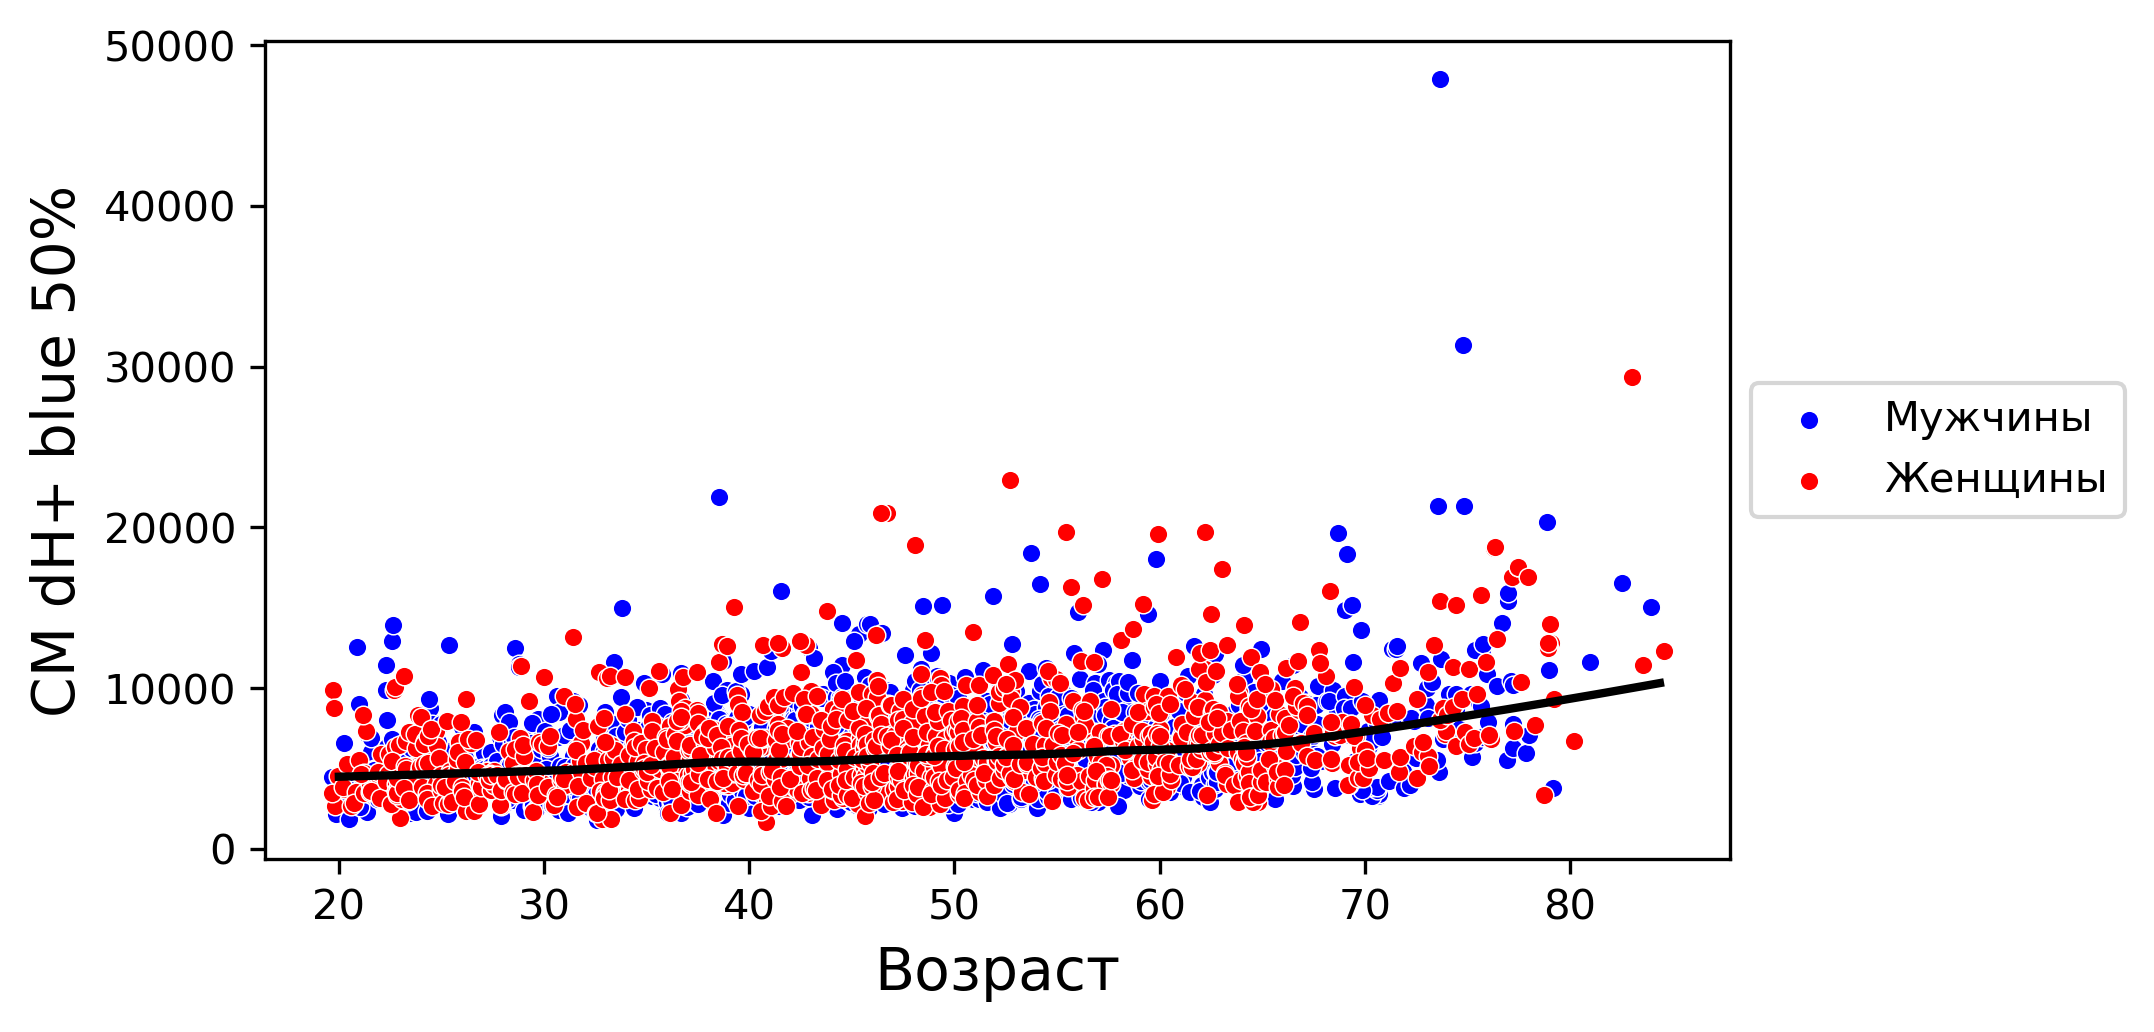

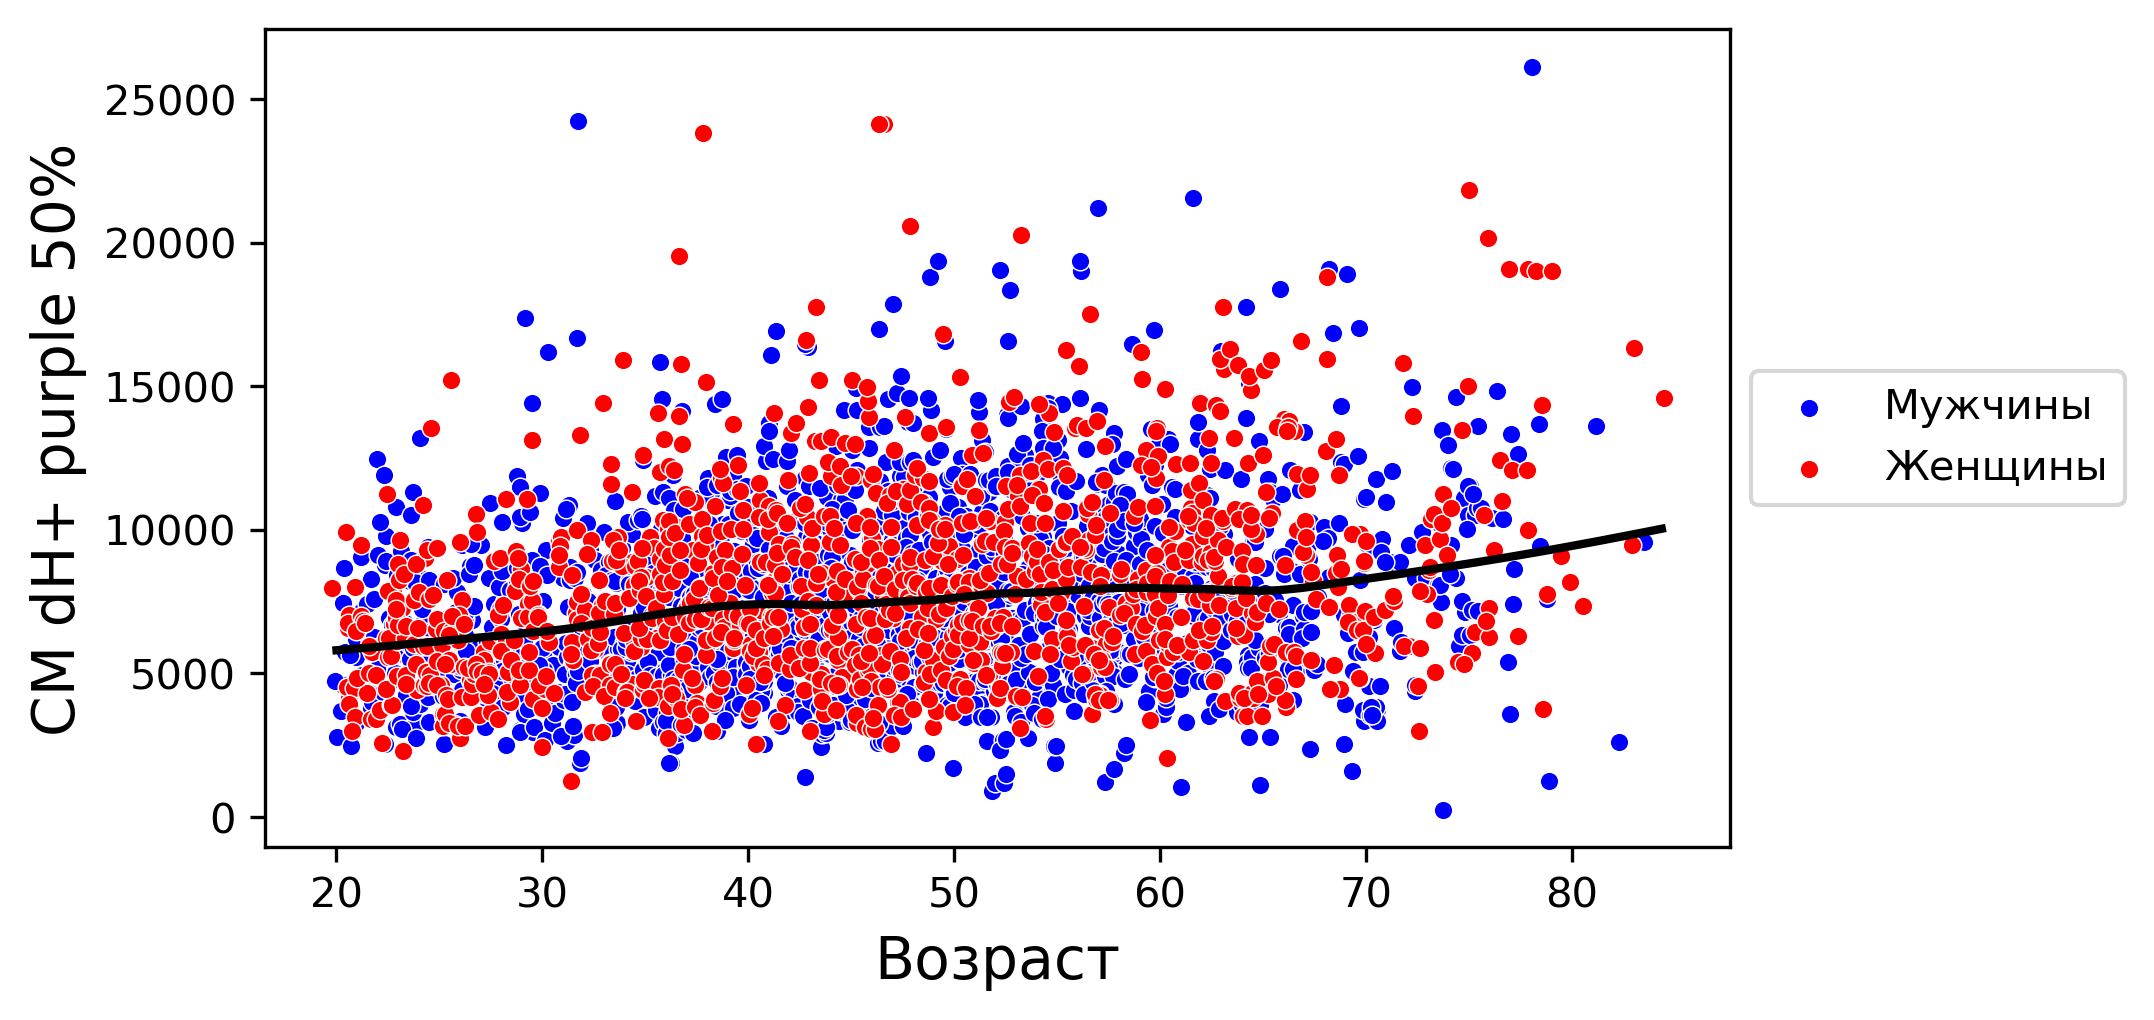

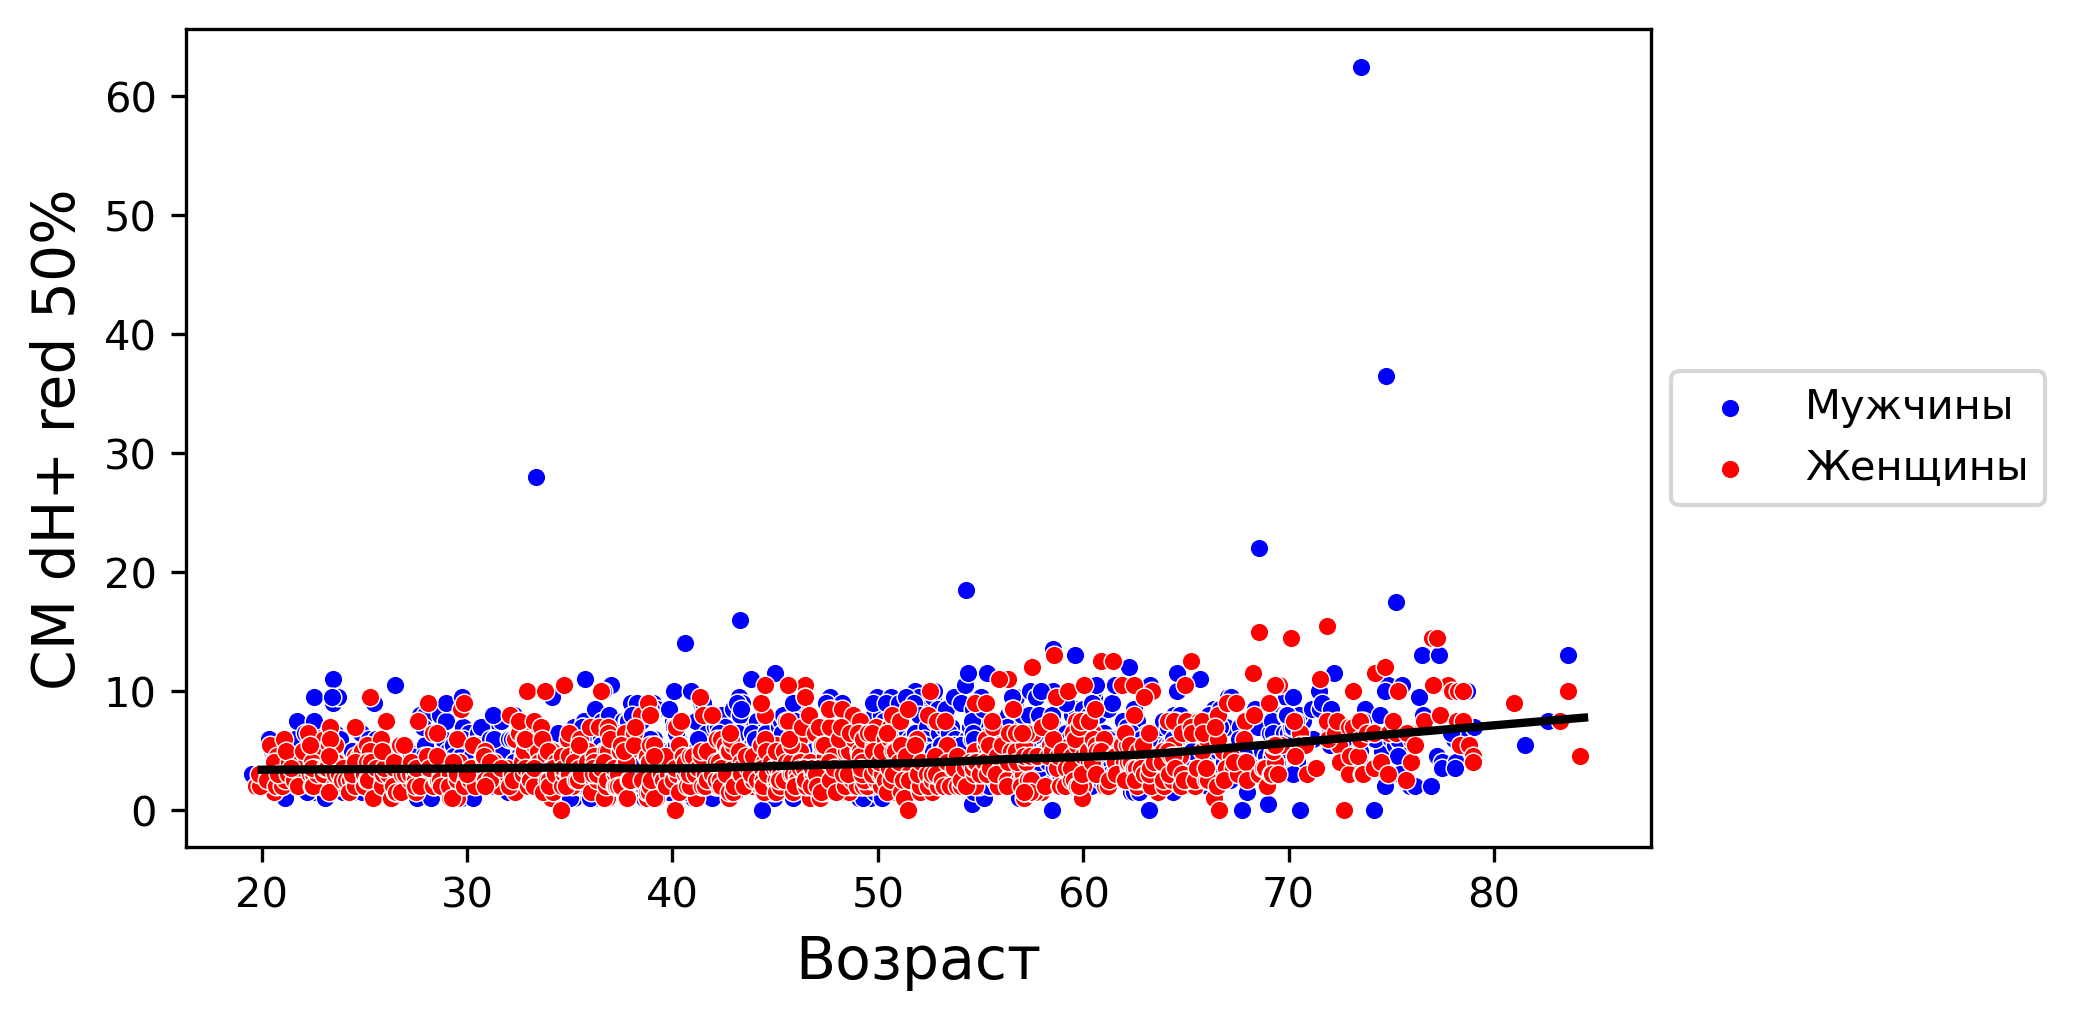

In [36]:
build_age_param_gender_scatterplots(test_data,columns)